# Practical Session : Mathematical Morphology and Histogram manipulations

The aim of this practical work is to get acquainted with mathematical morphology
transformations. Applying different operations with several structuring elements on
simple images will allow you understanding the actions, effects and properties of the
operations, the role of the structuring element, as well as the need for appropriate
pre-processing depending on the application at hand.

In this session, we will mainly focus on functions from the skimage.morphology package.

First, you have to download a set of images that you will use throughout the TP: https://partage.imt.fr/index.php/s/9YPTAzKsiXHQWH3

In [2]:
## imports
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
import skimage.morphology as morpho
import skimage.segmentation as seg
student = True

## Mathematical morphology

### The structuring element
The basic idea in mathematical orphology is to probe an image with a simple, pre-defined shape, drawing conclusions on how this shape fits or misses the shapes in the image. This simple "probe" is called the structuring element. For example, it can take the shape of a square, a disk or a diamond, with a predefined radius.

Use the function morpho.disk() of the morpho library to visualize a disk structuring element of radius 5. 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


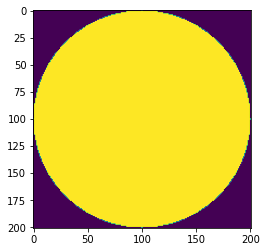

In [3]:
if student :
  strell = morpho.disk(100)

print(strell)
plt.imshow(strell)
plt.show()

Find a way to create a vertical line as a structuring element with parameter length l :

[[False False]
 [False False]
 [ True  True]
 [False False]
 [False False]]


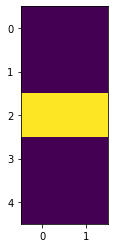

In [4]:
def line_strell(width,length):
  if student :
    strell = np.zeros((length, width), dtype=bool)
    strell[length // 2, :] = True
  return strell

strell = line_strell(2,5)
print(strell)
plt.imshow(strell)
plt.show()

### Binary Morphology
In this section, we will work on a cyto-image. Make sure to properly load the "cell.tif" image. Apply a thresholding of level t = 150 to that image to turn it into a binary image. Visualize the result in greyscale, by using the imshow function.

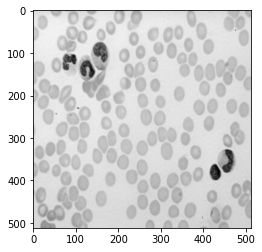

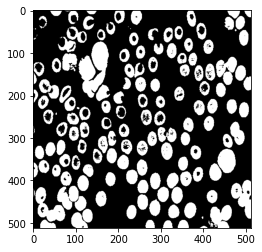

In [8]:
#load the cell image in grayscale and display it 
if student:
  img = skio.imread("images/cell.tif")
  plt.imshow(img, cmap = "gray")
  plt.show()
  thresh = img < 150
  plt.imshow(thresh, cmap = "gray")
  plt.show()

We will first start by applying simple binary morphological operations on those images. You will try the following operations:
- erosion
- dilation
- opening
- closing

You will try to visualize the results by varying the structuring element and its size.  

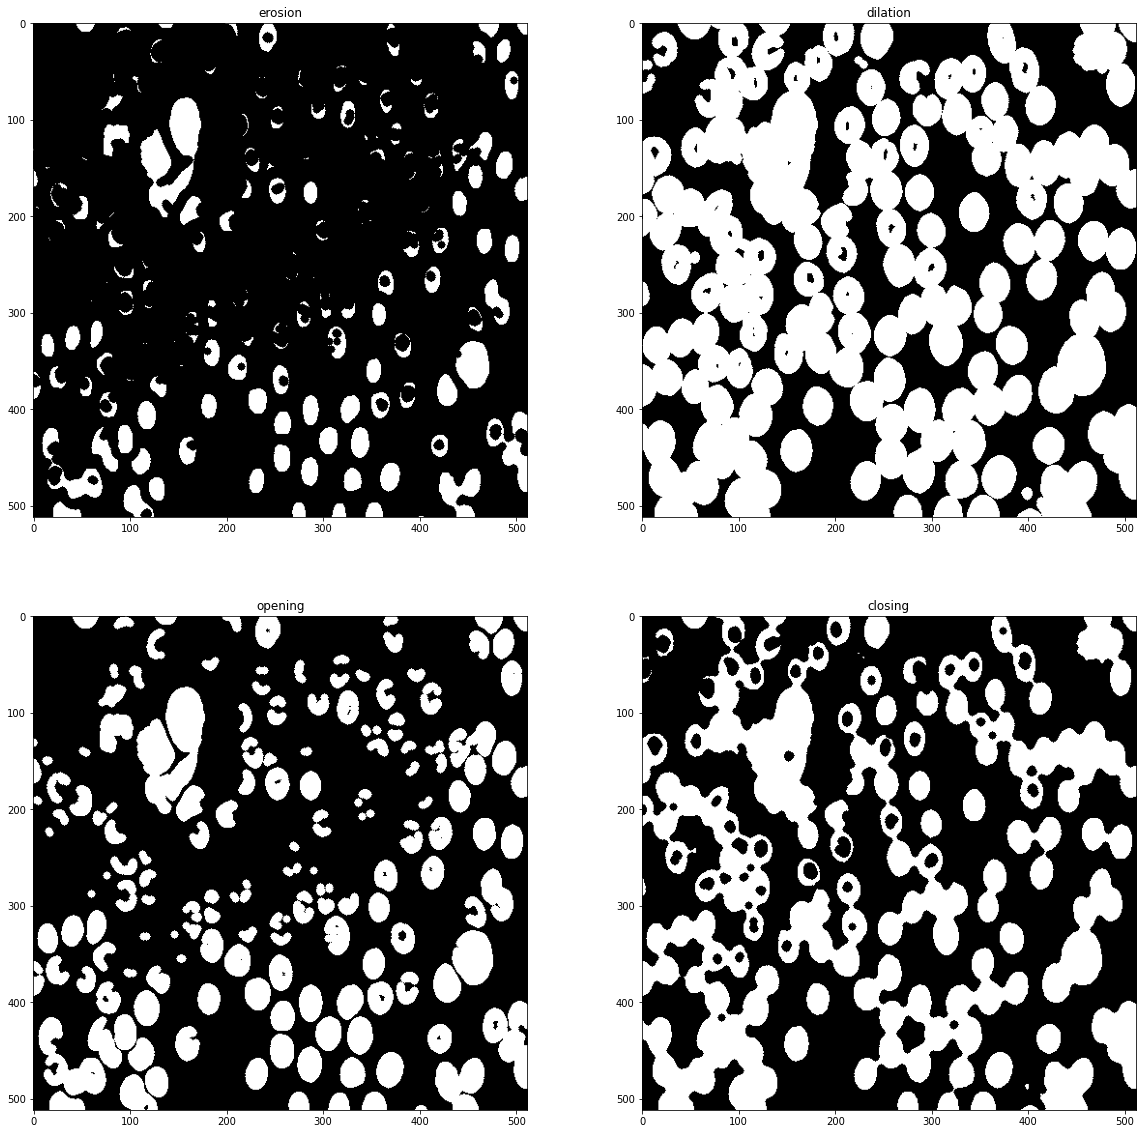

In [13]:
strell = morpho.disk(4)
fig,ax = plt.subplots(2, 2, figsize=(20,20))
image = thresh
imgs = [morpho.erosion(image, strell), morpho.dilation(image, strell), morpho.opening(image, strell), morpho.closing(image, strell)]# Add in this list the 4 images, obtained with the for operations
names = ["erosion","dilation","opening","closing"]
for i in range(4):
  ax[i//2,i%2].set_title(names[i])
  ax[i//2,i%2].imshow(imgs[i],cmap = "gray")
plt.show()

# try your own structuring elements and make the size vary
if student :
  pass

- **Q** : What is the influence of the shape of the structuring element ?
- **A** : Different shapes, like linear, circular, and complex elements, have distinct effects on image structures. Linear shapes impact linear features, while erosion reduces the thickness of such features. Circular shapes are suited for round regions and help fill gaps when dilating, while complex shapes can target specific image features, like cross-shaped elements. The choice of shape depends on the desired image processing result.
- **Q** : What is the influence of the size of the structuring element ?
- **A** : A small size for the structuring element is sensitive to small changes in images. We can use it when we want to remove artefacts. A bigger size for the structuring element is less sensitive to small details and aims to fusion shapes in an image

### Greyscale Morphology
In this section, we will use the bateau.tif image. Make sure to load it and visualize it in greyscale.


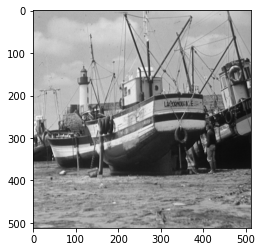

In [10]:
#load the bateau image in grayscale and display it 
if student:
  img = skio.imread("images/bateau.tif")
  plt.imshow(img, cmap = "gray")
  plt.show()

Apply the same 4 operations as before (dilation,erosion,opening,closing) and visualize the results. Try out different structuring elements and different sizes.

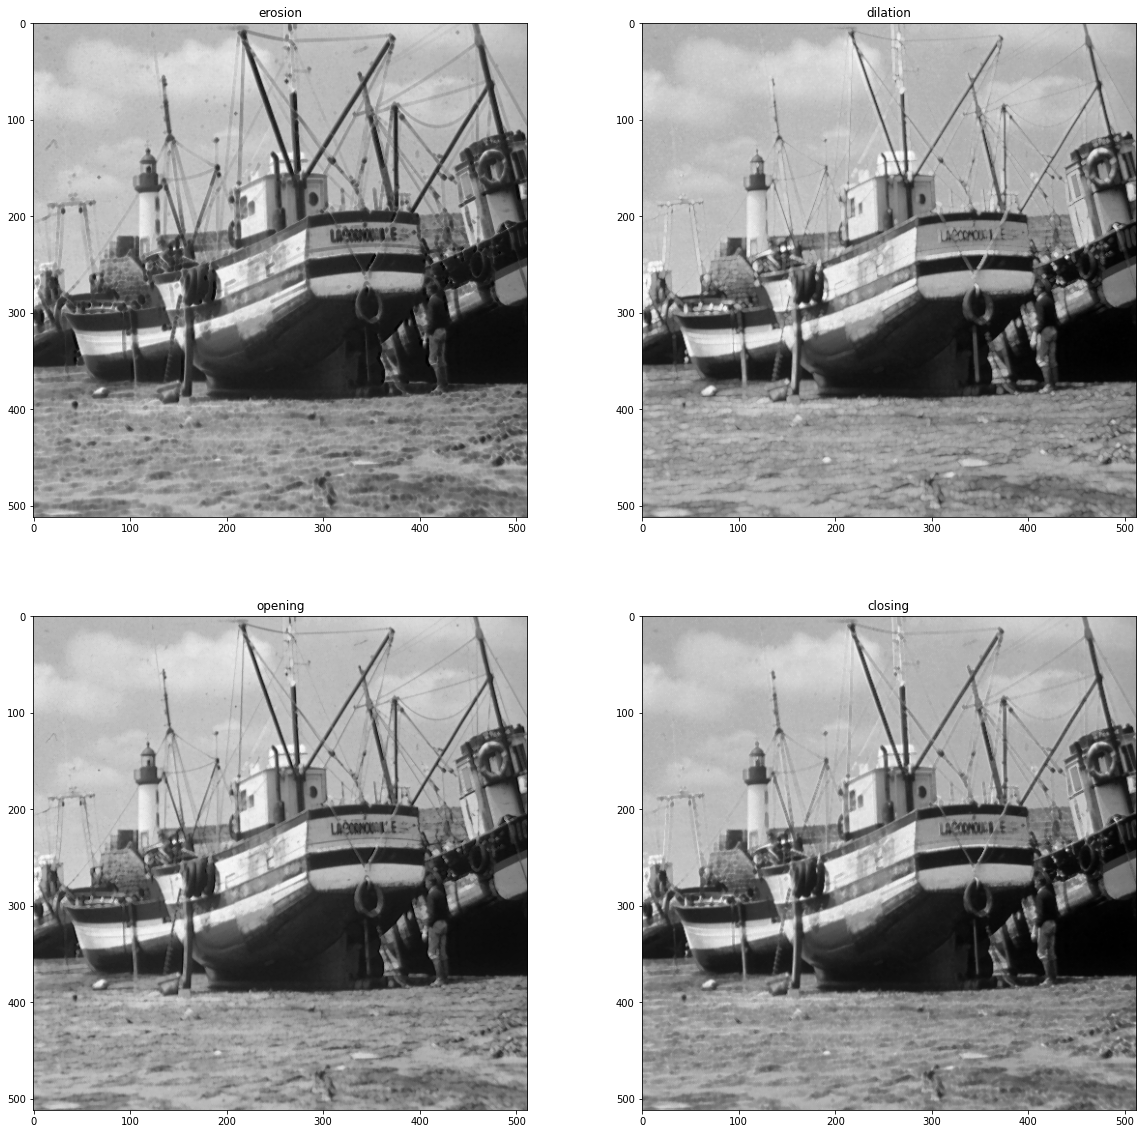

In [12]:
if student:

    eroded = morpho.erosion(img, strell)
    dilated = morpho.dilation(img, strell)
    opened = morpho.opening(img, strell)
    closed = morpho.closing(img, strell)

    strell = morpho.disk(3)
    fig,ax = plt.subplots(2, 2, figsize=(20,20))
    image = thresh
    imgs = [eroded, dilated, opened, closed]# Add in this list the 4 images, obtained with the for operations
    names = ["erosion","dilation","opening","closing"]
    for i in range(4):
        ax[i//2,i%2].set_title(names[i])
        ax[i//2,i%2].imshow(imgs[i],cmap = "gray")
    plt.show()


- **Q** : What is the influence of the shape and size parameters of the structuring element ?
- **A** : The shape and size parameters of the structuring element in grayscale morphological operations influence the degree of smoothing, sharpening, and structural changes in the image. A larger structuring element with a different shape will have a greater impact on the image's features, while a smaller one will be more localized and preserve finer details. The choice of shape can also affect the direction of smoothing or enhancement.

- **Q** : We then now try to illustrate the iterativity property. What is the
result of a dilation by a disk structuring element of size 2 followed by a dilation by a
disk structuring element of size 3? Compare it with a dilation by a disk of size 5. Explain.
- **A** : We can observe on the difference image the shape of the boat. It shows us that doing a dilation in two steps is not equal to a single dilation. The brightness of the pixels on the edges of the boat is different.

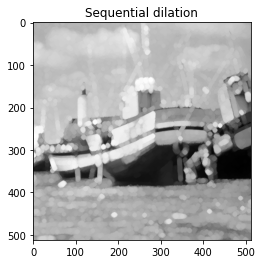

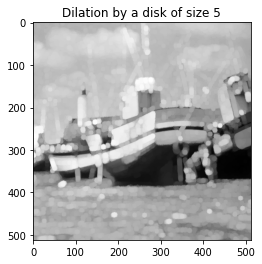

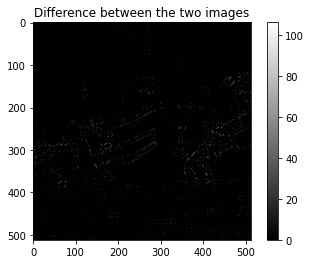

53953050


In [17]:
if student:
  ### start code

  #thresh = (img > 150).astype(np.uint8)*255

  strell2 = morpho.disk(2)
  strell3 = morpho.disk(3)
  strell5 = morpho.disk(5)

  dilation = morpho.dilation(img, strell2)

  sequential_dilation = morpho.dilation(dilation, strell3)
  plt.imshow(sequential_dilation, cmap = "gray")
  plt.title("Sequential dilation")
  plt.show()

  dilation5 = morpho.dilation(img, strell5)
  plt.imshow(dilation5 ,cmap = "gray")
  plt.title("Dilation by a disk of size 5")
  plt.show()

  plt.imshow(dilation5-sequential_dilation,cmap = "gray")
  plt.title('Difference between the two images')
  plt.colorbar()
  plt.show()
  print(np.sum(np.abs(dilation-sequential_dilation)))

- **Q:** Plot the result of an opening by a disk structuring element of size 2 followed by
an opening by a disk structuring element of size 3? 
Compare with a dilation of the image by (a disk of size 2 dilated by a disk of size 3). Please note that you might have to use the np.pad function to perform this. Conclude.
- **A:** This technic can give us a very approximative segmentation. The image produced is very noisy.

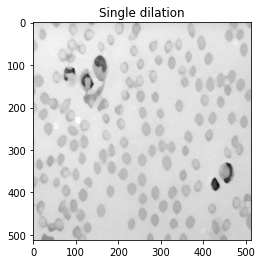

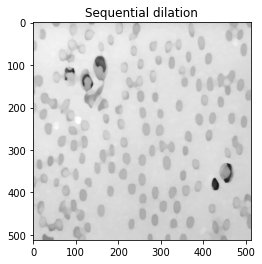

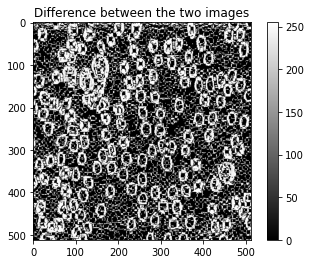

25007933


In [106]:
if student:
 # First create the sequential structuring element, that is a disk of size 2 dilated by a disk of size 3
    sqr_strell = morpho.disk(2)
    sqr_strell = np.pad(sqr_strell, 1, mode='constant', constant_values=0)
    sqr_strell = morpho.dilation(sqr_strell, morpho.disk(3))

    # Use it to perform the image dilation
    dilation = morpho.dilation(img, sqr_strell)
    plt.imshow(dilation,cmap = "gray")
    plt.title("Single dilation")
    plt.show()
  
    # Compare it with the sequential dilation
    sequential_dilation = morpho.dilation(morpho.dilation(img,morpho.disk(2)),morpho.disk(3))
    plt.imshow(sequential_dilation,cmap = "gray")
    plt.title("Sequential dilation")
    plt.show()
    
    plt.imshow(dilation-sequential_dilation,cmap = "gray")
    plt.title('Difference between the two images')
    plt.colorbar()
    plt.show()
    print(np.sum(np.abs(dilation-sequential_dilation)))

- **Q:** How can you illustrate the idempotence of closing ? Show your illustration in the following cell.


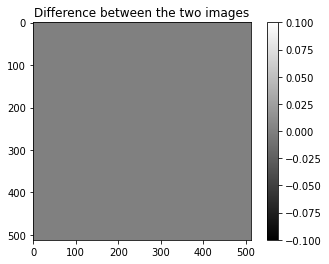

In [24]:
if student :
  strell = morpho.disk(2)
  closing1 = morpho.closing(img, strell)
  closing2 = morpho.closing(closing1, strell)
  plt.imshow(closing2-closing1,cmap = "gray")
  plt.title('Difference between the two images')
  plt.colorbar()
  plt.show()
  # we see that the result is an image full of 0 pixels

- **Q** : Perform a top-hat transform in the following cell (difference between the image and its opening).
Comment the result depending on the choice of the structuring element.
- **A** : With a top-hat transform we can extract small elements and edges of objects in the image.

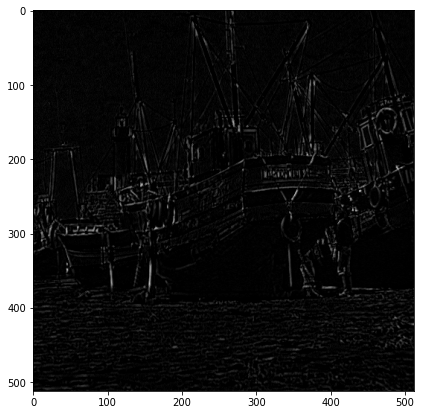

In [20]:
if student:
  ### start code
  strell = morpho.disk(2)
  top_hat = img - morpho.opening(img, strell)
plt.figure(figsize = (7,7))
plt.imshow(top_hat,cmap = "gray")
plt.show()

- **Q** : Perform a dual top-hat transform in the following cell (difference between the closing and the image).
Comment the result depending on the choice of the structuring element.
- **A** : We see that the result is quite the same as the top hat transform. Only the brightness is different. For the structuring element, we used a square and a disk : in both case we see very clearly the main shapes in the images.

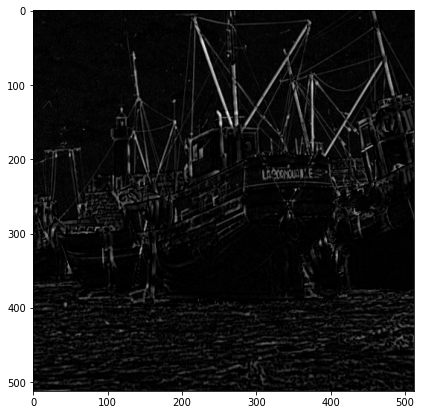

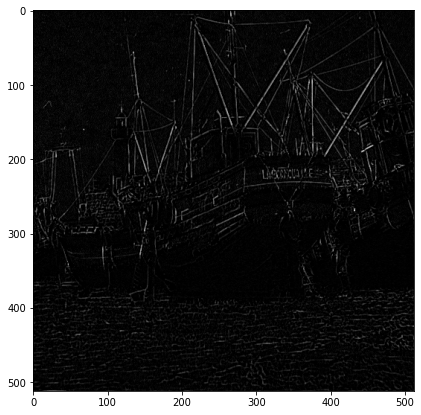

In [35]:
if student:
  ### start code
  strell_s = morpho.square(3)
  strell_d = morpho.disk(3)
  dual_top_hat_d = morpho.closing(img, strell_d) - img
  dual_top_hat_s = morpho.closing(img, strell_s) - img
plt.figure(figsize = (7,7))
plt.imshow(dual_top_hat_d,cmap = "gray")
plt.show()
plt.figure(figsize = (7,7))
plt.imshow(dual_top_hat_s,cmap = "gray")
plt.show()

### Alternating Filters
- **Q**: Perform alternate sequential filters, for instance by performing sequential opening and then closing by squares of radius ranging from 1 to 5. Also try out your own combinations. What kind of filtering can be expected from such
operations?
- **A**: When we do this kind of sequential operations we are smoothing the original image and we tend to construct a new image with a global shape of the structuring element.

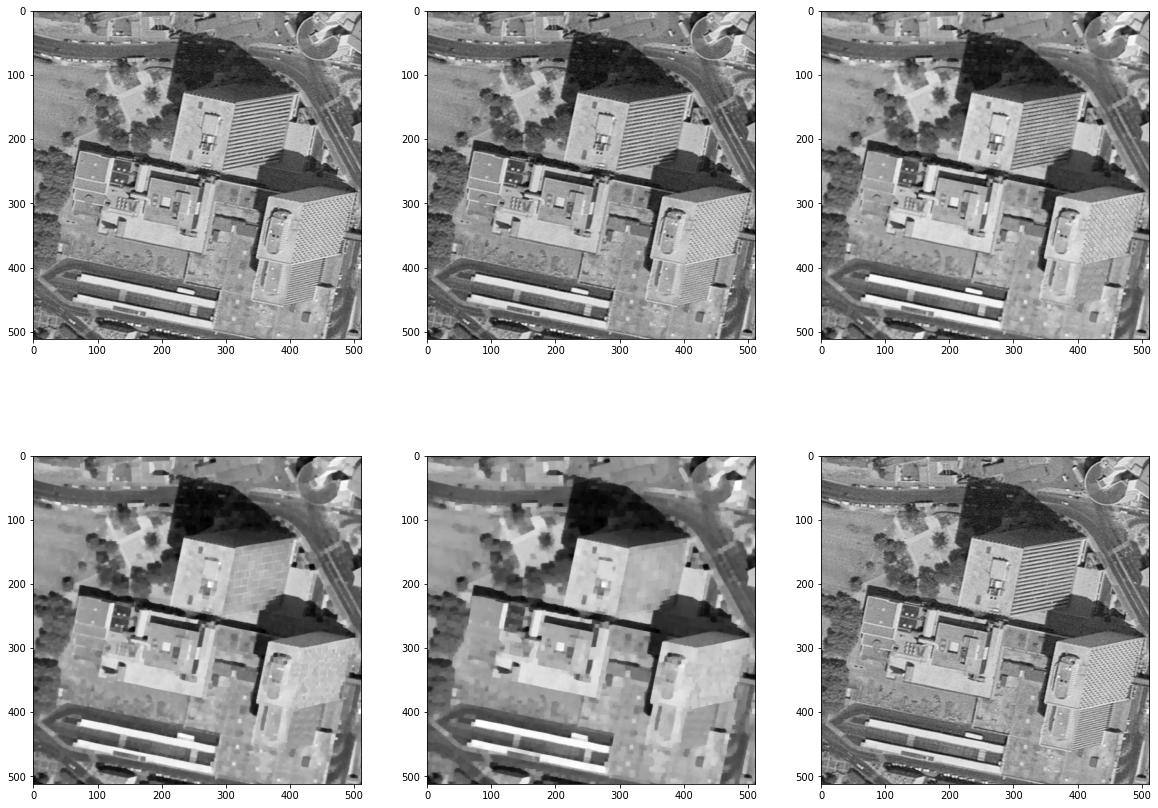

In [36]:
# Example
img = skio.imread("images/montreuil.tif")

# Structuring elements
se1=morpho.square(1)
se2=morpho.square(2)
se3=morpho.square(3)
se4=morpho.square(4)
se5=morpho.square(5)

# Images
fas1=morpho.opening(img, se1)
fas2=morpho.closing(fas1, se2)
fas3=morpho.opening(fas2, se3)
fas4=morpho.closing(fas3, se4)
fas5=morpho.opening(fas4, se5)

fig,ax = plt.subplots(2,3,figsize = (20,15))
ax[0,0].imshow(fas1,cmap = "gray")
ax[0,1].imshow(fas2,cmap = "gray")
ax[0,2].imshow(fas3,cmap = "gray")
ax[1,0].imshow(fas4,cmap = "gray")
ax[1,1].imshow(fas5,cmap = "gray")
ax[1,2].imshow(img,cmap = "gray")
plt.show()

#Try you own
if student :
  o1=morpho.opening(img, se1)
  o2=morpho.opening(img, se2)
  o3=morpho.opening(img, se3)
  o4=morpho.closing(img, se1)
   

### Segmentation
 - **Q** : Apply a morphological gradient to the image cell.tif (difference between
dilation and erosion with a structuring element of radius1). What do you observe ?

- **A**: The new image displays the edges of the cells. A particularity is that these edges are in a different level of gray following the darkness of the object in the original image.

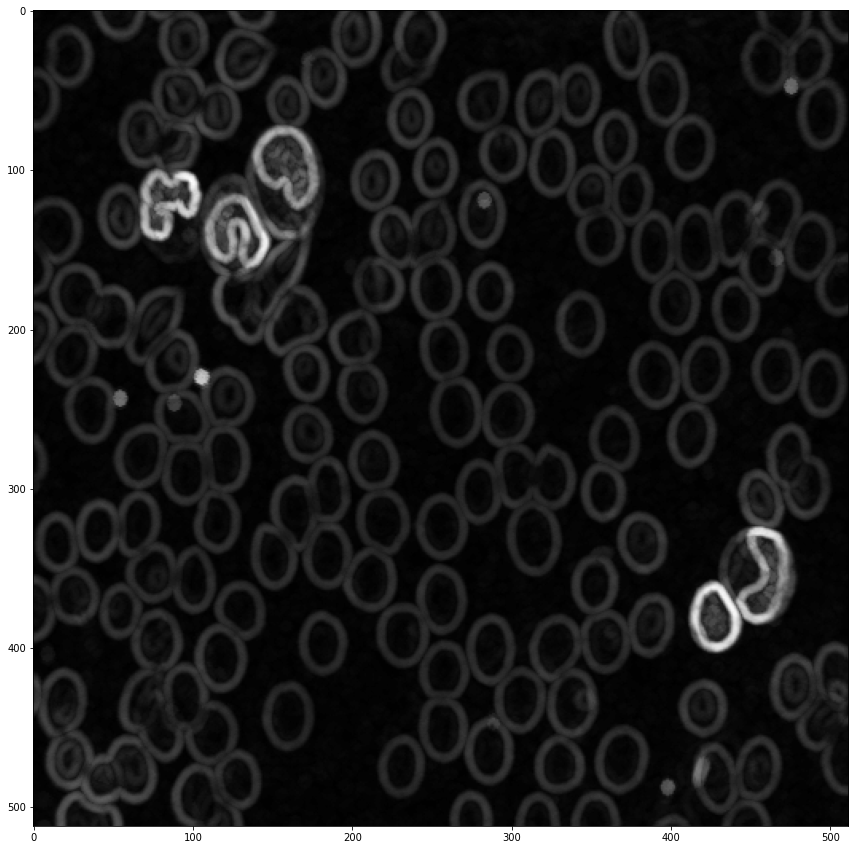

In [37]:
if student : 
  strell = morpho.disk(3)
  img = skio.imread("images/cell.tif")
  morpho_grad = morpho.dilation(img, strell) - morpho.erosion(img, strell)
plt.figure(figsize=(15,15))
plt.imshow(morpho_grad,cmap = "gray")
plt.show()


- **Q** : Try to threshold the gradient with a value of 25 for instance. Why is it difficult to find an appropriate threshold value ?
- **A** : It is very sensible and we see a big difference in thresholding between a value of 25 and 20

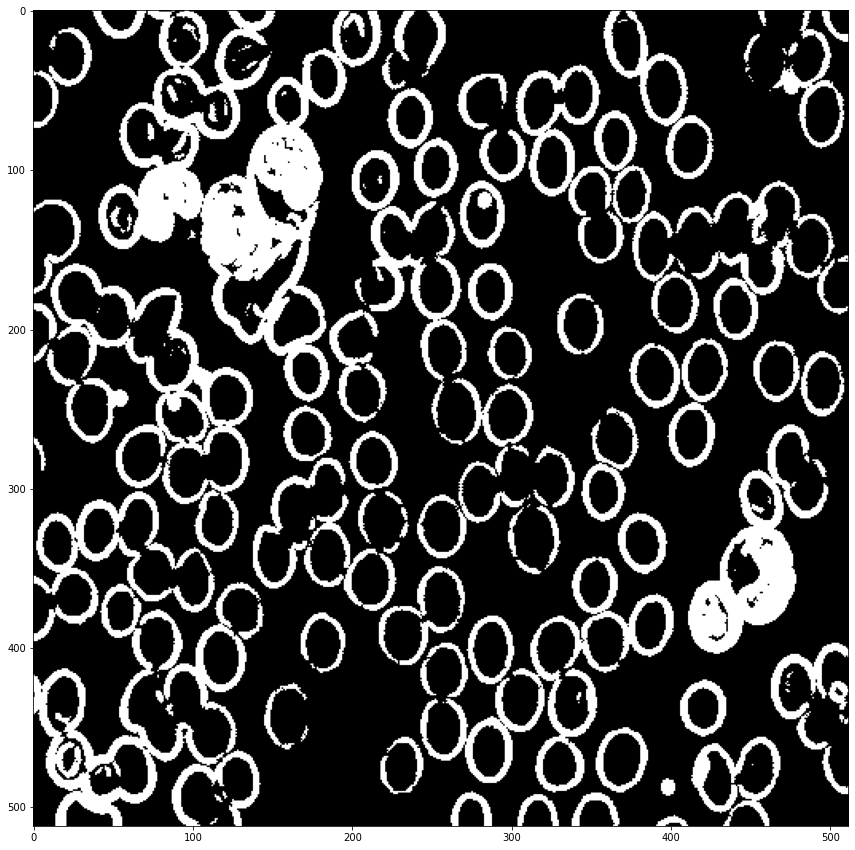

In [45]:
if student :
  thresh_grad = morpho_grad > 20
plt.figure(figsize=(15,15))
plt.imshow(thresh_grad,cmap  ="gray")
plt.show()

- **Q** Apply the watershed algorithm to the gradient image using morpho.watershed(morpho_grad,k) ;
What do you observe ? 
- **A** : This is not very well segmented. For a parameter k=2, we see a unicolor image.
- **Q** Try to change the parameter k ; what is the role of that parameter ?
- **A** : This parameter is the number of regions in our watersheded image. Even for a high value this doesn't work very well

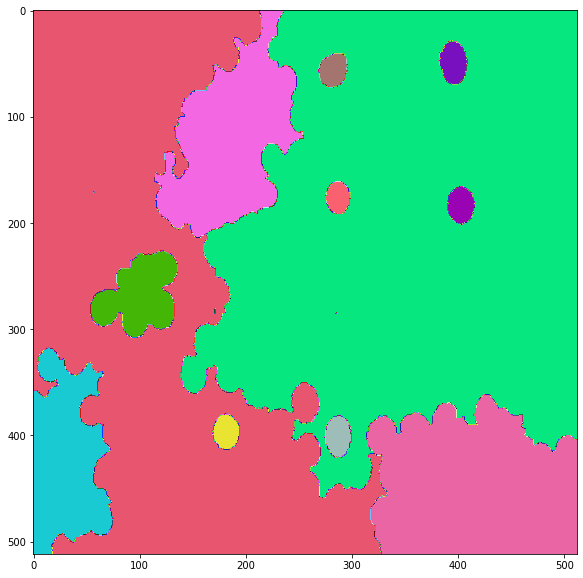

In [86]:
import matplotlib
cmaprand = matplotlib.colors.ListedColormap (np.random.rand(256, 3))
if student :
  wat = seg.watershed(morpho_grad, 20)
plt.figure(figsize =(10,10))
plt.imshow(wat, cmap =cmaprand)
plt.show()

- **Q** : Apply first a closing on the gradient image and then the watershed. Is the result better ? In which sense and why ?
- **A** : The result is nearly the same. A lot of cells are put together.
- **Q** : Apply an opening with the same structuring element on the gradient image and then do a watershed. What is the difference between this operation and the previous? 
- **A** : In this case too we cannot see a significant change. The difference between this operation and the previous is that big regions contain a lot more smaller regions. This image is more similar to the Morpho_gradient -> Watershed Image than the previous one.

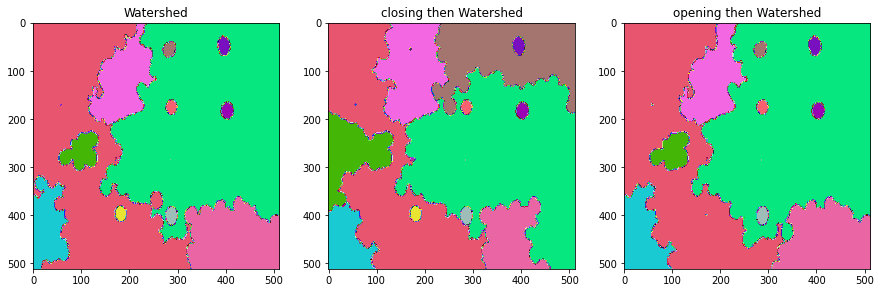

In [87]:
if student :
  strell = morpho.disk(2)
  wat_closing = seg.watershed(morpho.closing(morpho_grad, strell), 20)
  wat_opening = seg.watershed(morpho.opening(morpho_grad, strell), 20)

fig,ax = plt.subplots(1,3,figsize = (15,15))
ax[0].set_title("Watershed")
ax[0].imshow(wat, cmap =cmaprand)
ax[1].set_title("closing then Watershed")
ax[1].imshow(wat_closing,cmap =cmaprand)
ax[2].set_title("opening then Watershed")
ax[2].imshow(wat_opening, cmap =cmaprand)
plt.show()

Your objective is to try to do better than what you did with the closure and opening. To do that, we propose to use specific markers for the watershed transform.

**Q** : In the next cell, compute the reconstruction from an opening of the gradient. You can use as structuring element a disk of size 5. What do you observe ? Could it help you to efficiently segment the cells ?

**A** : Reconstruction of an image from an opening allows recovery of small parts of objects partially preserved by the opening. With this method it can be much more easier to segment because the cells are well separated with a thick edge for each of them. Howerver, we may loose a bit of precision because of the thick edge.

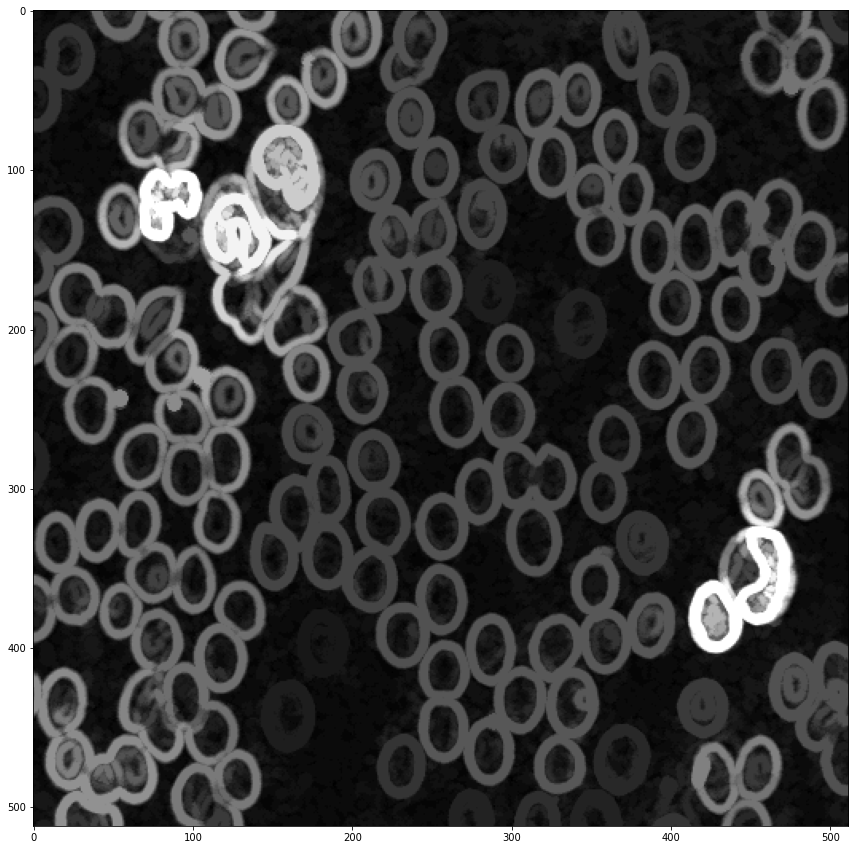

In [94]:
strell = morpho.disk(5)
imOpen = morpho.opening(morpho_grad, strell)
reco= morpho.reconstruction(imOpen, morpho_grad)
plt.figure(figsize =(15,15))
plt.imshow(reco,cmap = "gray")
plt.show()

**Q** : In the next cell, compute the reconstruction from an closing of the gradient. You can use as structuring alement a disk of size 5. What do you observe ? Could it help you to efficiently segment the cells ?

**A** : We observe that the structures are more linked with this method. In this case it could be much more difficult to segment because of the linked structures.

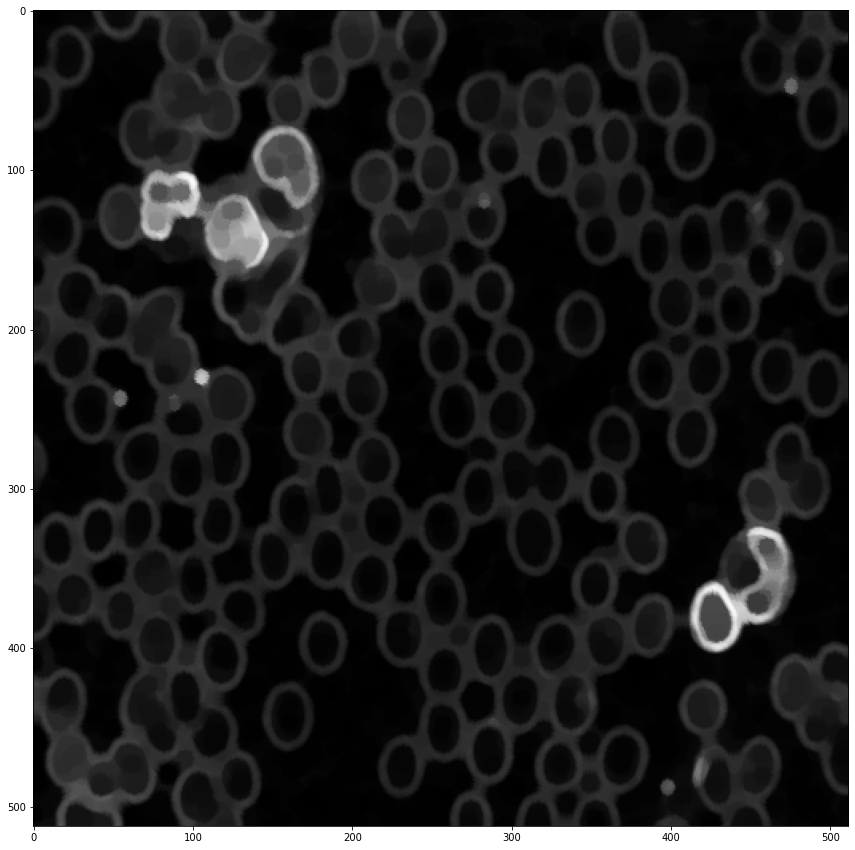

In [92]:
strell = morpho.disk(5)
imClos = morpho.closing(morpho_grad, strell)
reco= morpho.reconstruction(morpho_grad, imClos)
plt.figure(figsize =(15,15))
plt.imshow(reco,cmap = "gray")
plt.show()

**Q** : This last part is less guided. Use the reconstruction operation and the above questions to find good markers for the watershed algorithm. You could benefit from using the peak_local_max function of skimage.feature

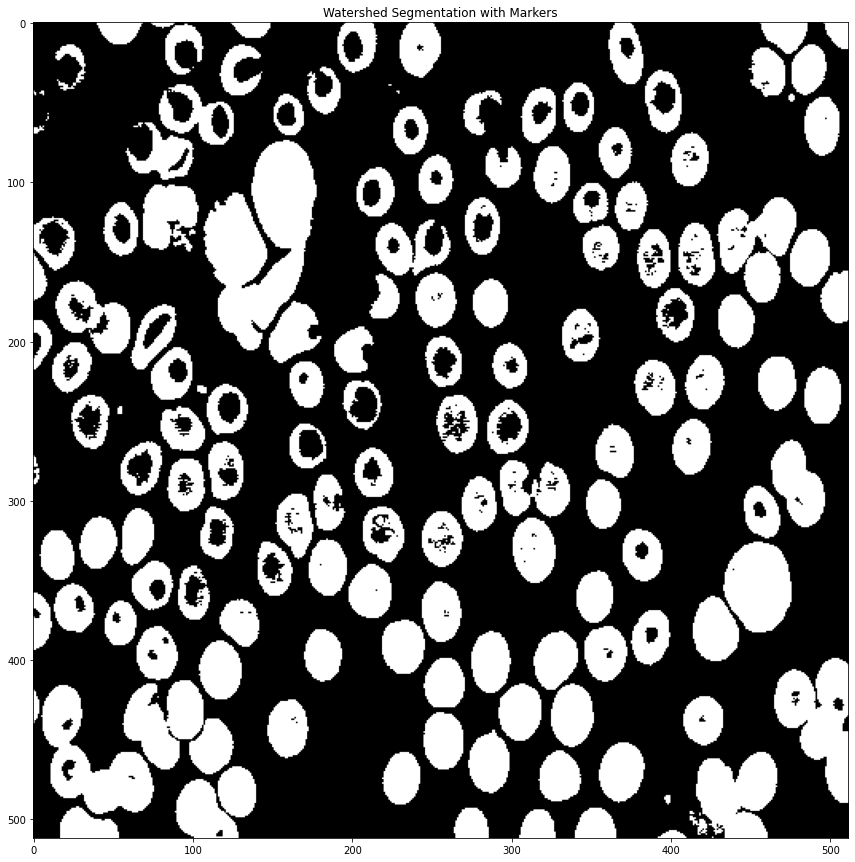

In [103]:
from skimage import color, feature
from skimage.segmentation import mark_boundaries

# Define the structuring element as a disk of size 5
selem = morpho.disk(5)

# Perform the opening of the gradient
gradient = morpho_grad

# Perform the reconstruction from the opening of the gradient
reco = morpho.reconstruction(image, gradient,method='dilation')

# Detect local maxima in the reconstructed image
local_maxima = feature.peak_local_max(reco, min_distance=10)

# Create markers for the watershed algorithm
markers = np.zeros_like(reco, dtype=np.uint8)
markers[local_maxima[:, 0], local_maxima[:, 1]] = 1

# Apply the watershed segmentation
labels = seg.watershed(-reco, markers, mask=image)

# Display the segmented image
plt.figure(figsize=(15, 15))
boundaries = mark_boundaries(image, labels)
plt.imshow(boundaries, cmap='gray')
plt.title("Watershed Segmentation with Markers")
plt.show()